In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
stu_19 = pd.read_csv('../data/summary_student.csv')

In [19]:
stu_19.head(2)

dbn                     school_name  student_response_rate     1a  \
0  01M034  P.S. 034 FRANKLIN D. ROOSEVELT                   95.0  17.31   
1  01M140          P.S. 140 NATHAN STRAUS                   87.0  16.22   

      1b     1c     1d     1e     1f     1g  ...    8b    8c    8d    8e  \
0  20.33  13.86  14.69  30.21  26.27  19.69  ...  2.62  2.50  2.68  2.46   
1  13.52  11.91  12.06  25.48  18.44  18.73  ...  2.34  2.13  2.41  2.67   

     8f    8g    8h    9a    9b  combined_mean_score  
0  2.76  1.73  1.80  3.11  3.16           587.928579  
1  2.67  1.47  1.81  3.16  3.18           589.583906  

[2 rows x 62 columns]

#### Looking for collinearity

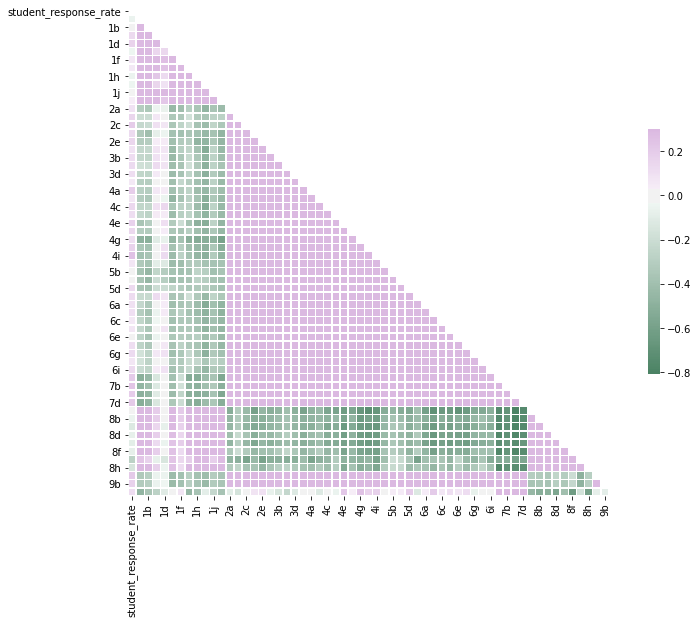

In [44]:
# from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Compute the correlation matrix
corr = stu_19.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

There are quite a bit of questions that appear to be correlated. Questions 

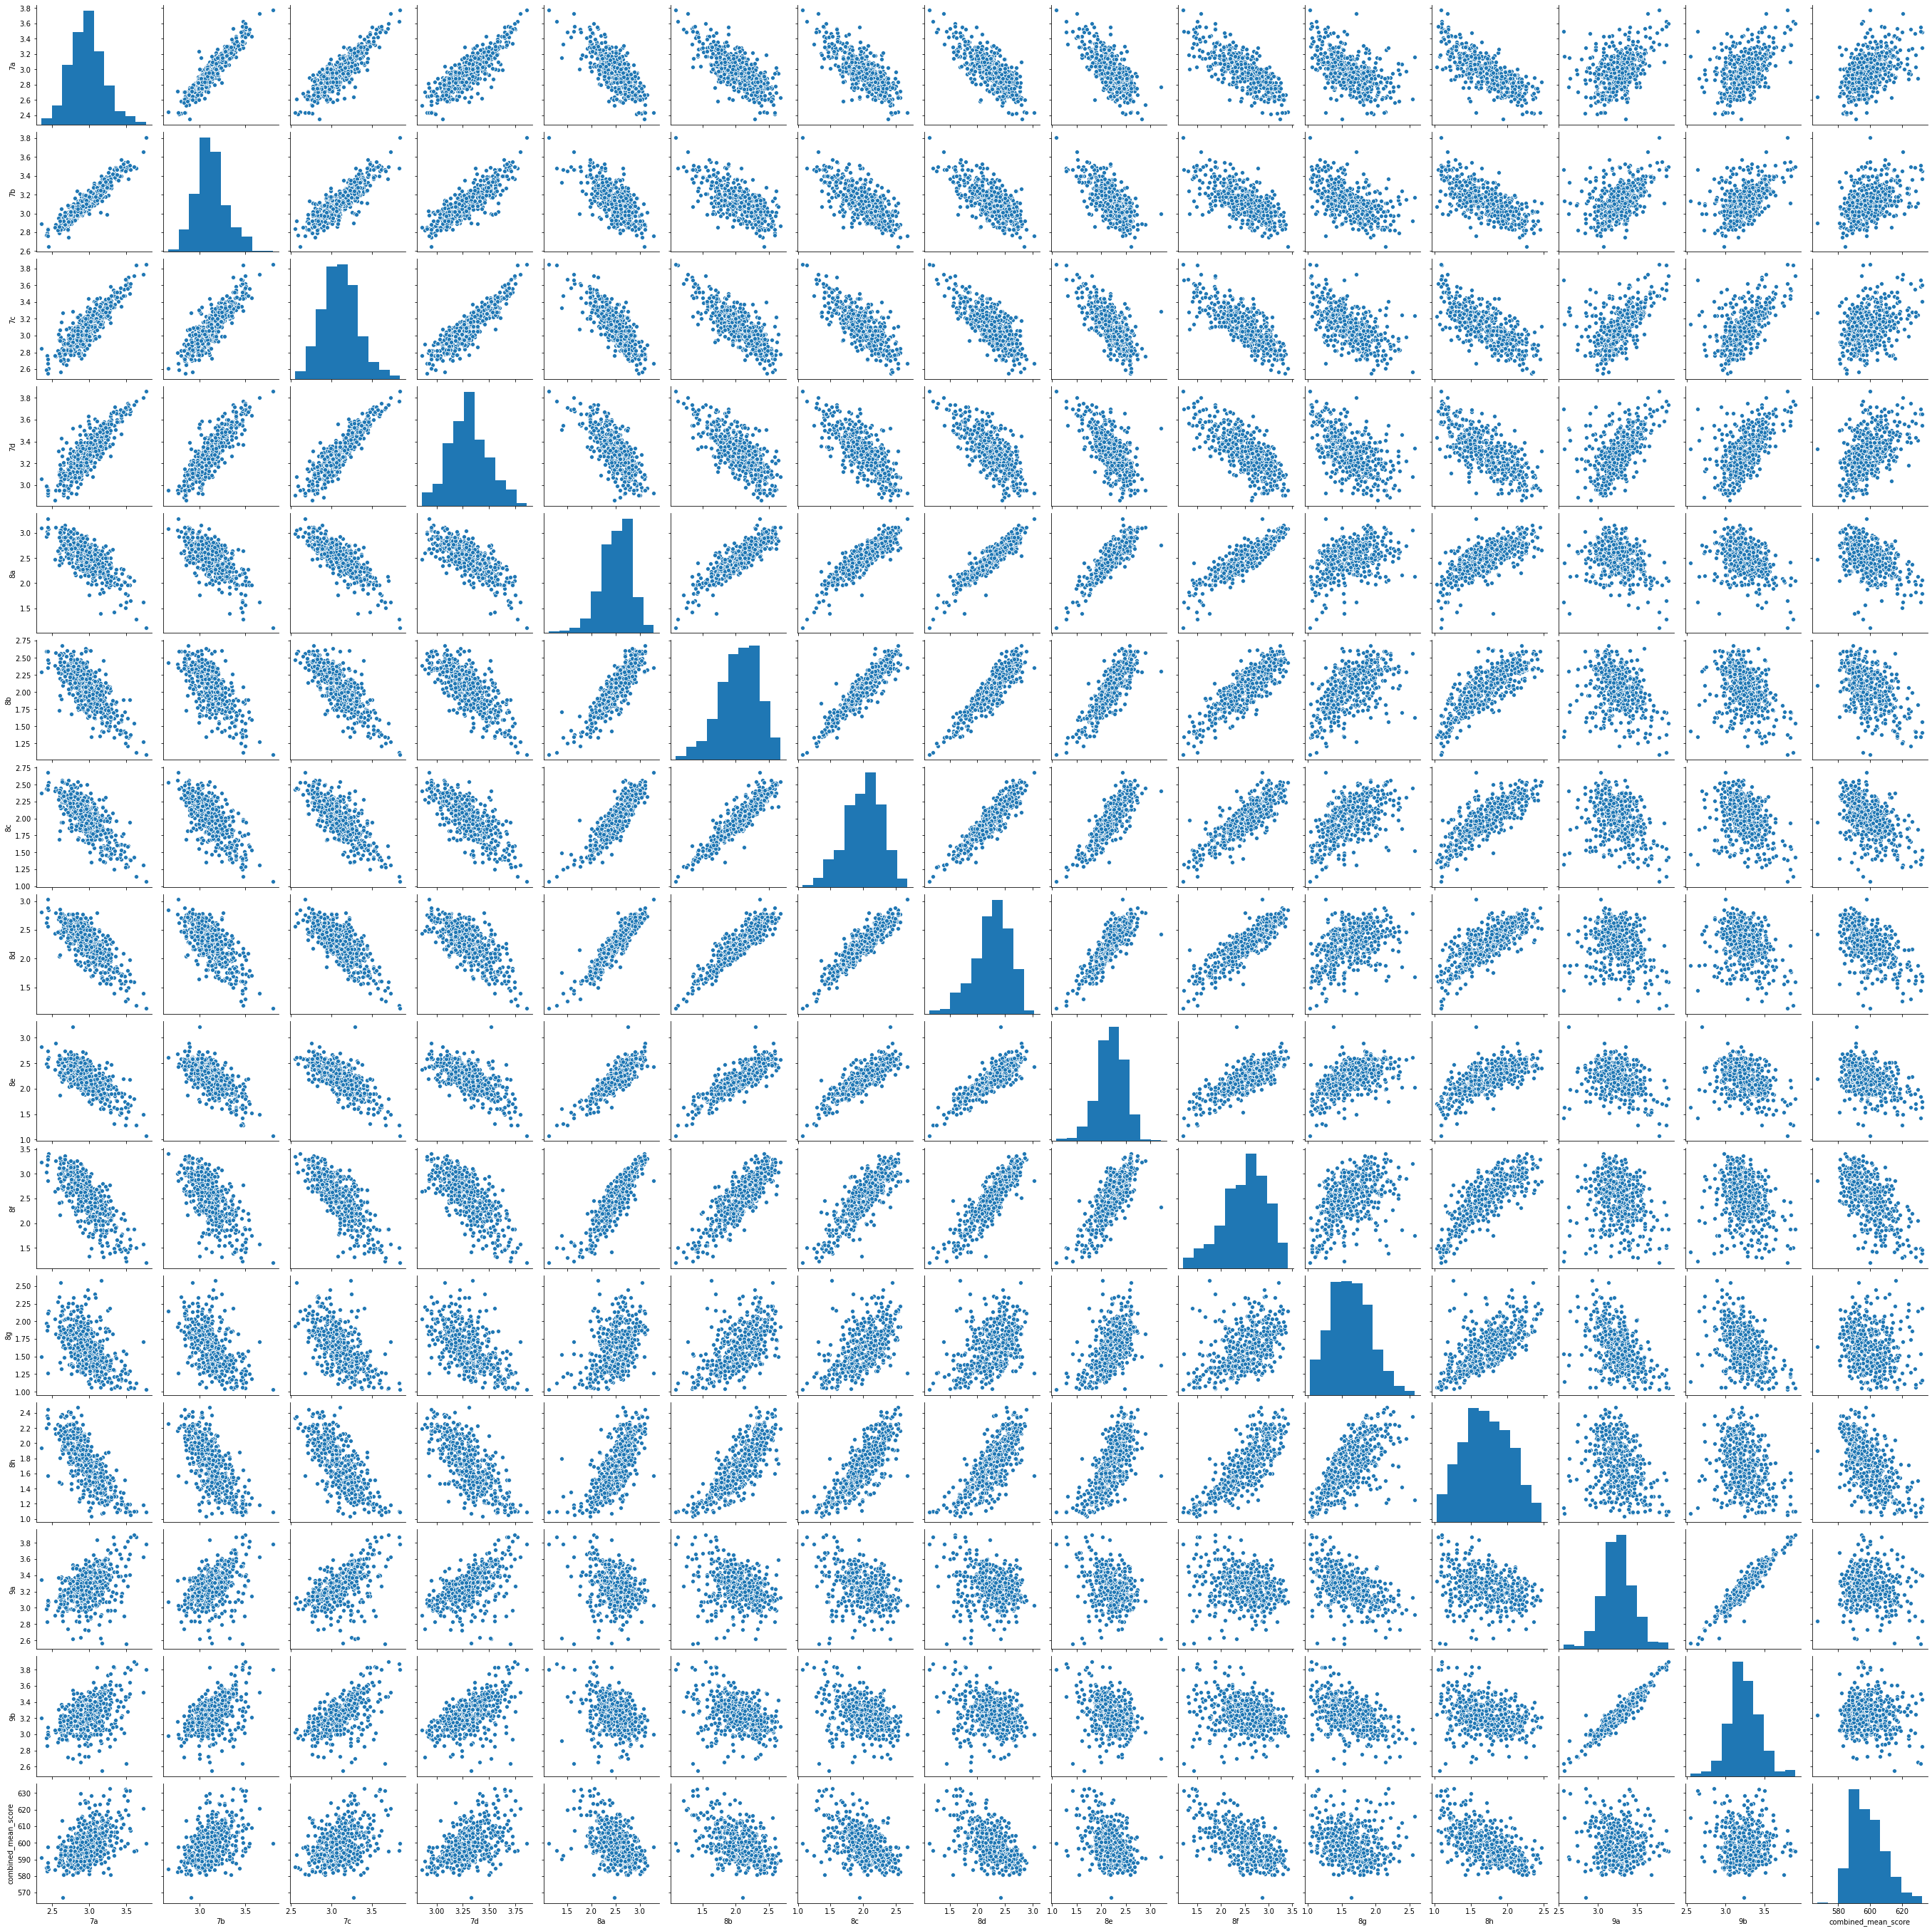

In [7]:
# look at questions 7s, 8s, and 9s
sns.pairplot(stu_19.iloc[:, -15:]);

It looks like a lot of the questions here have pretty strong linear relationship. Questions in 8s are asking about students' perception on safety within the school, and questions 8s are asking questionos related to safety outside the school. Because the ordinal scales from the answers are point to opposite direction, the negative relationships make sense. Question 9a and 9b both relate to high school choice guidance, so it makes sense that they are both very correlated. Questions 9a and 9b can definitely be added together and represented as one or just use one.

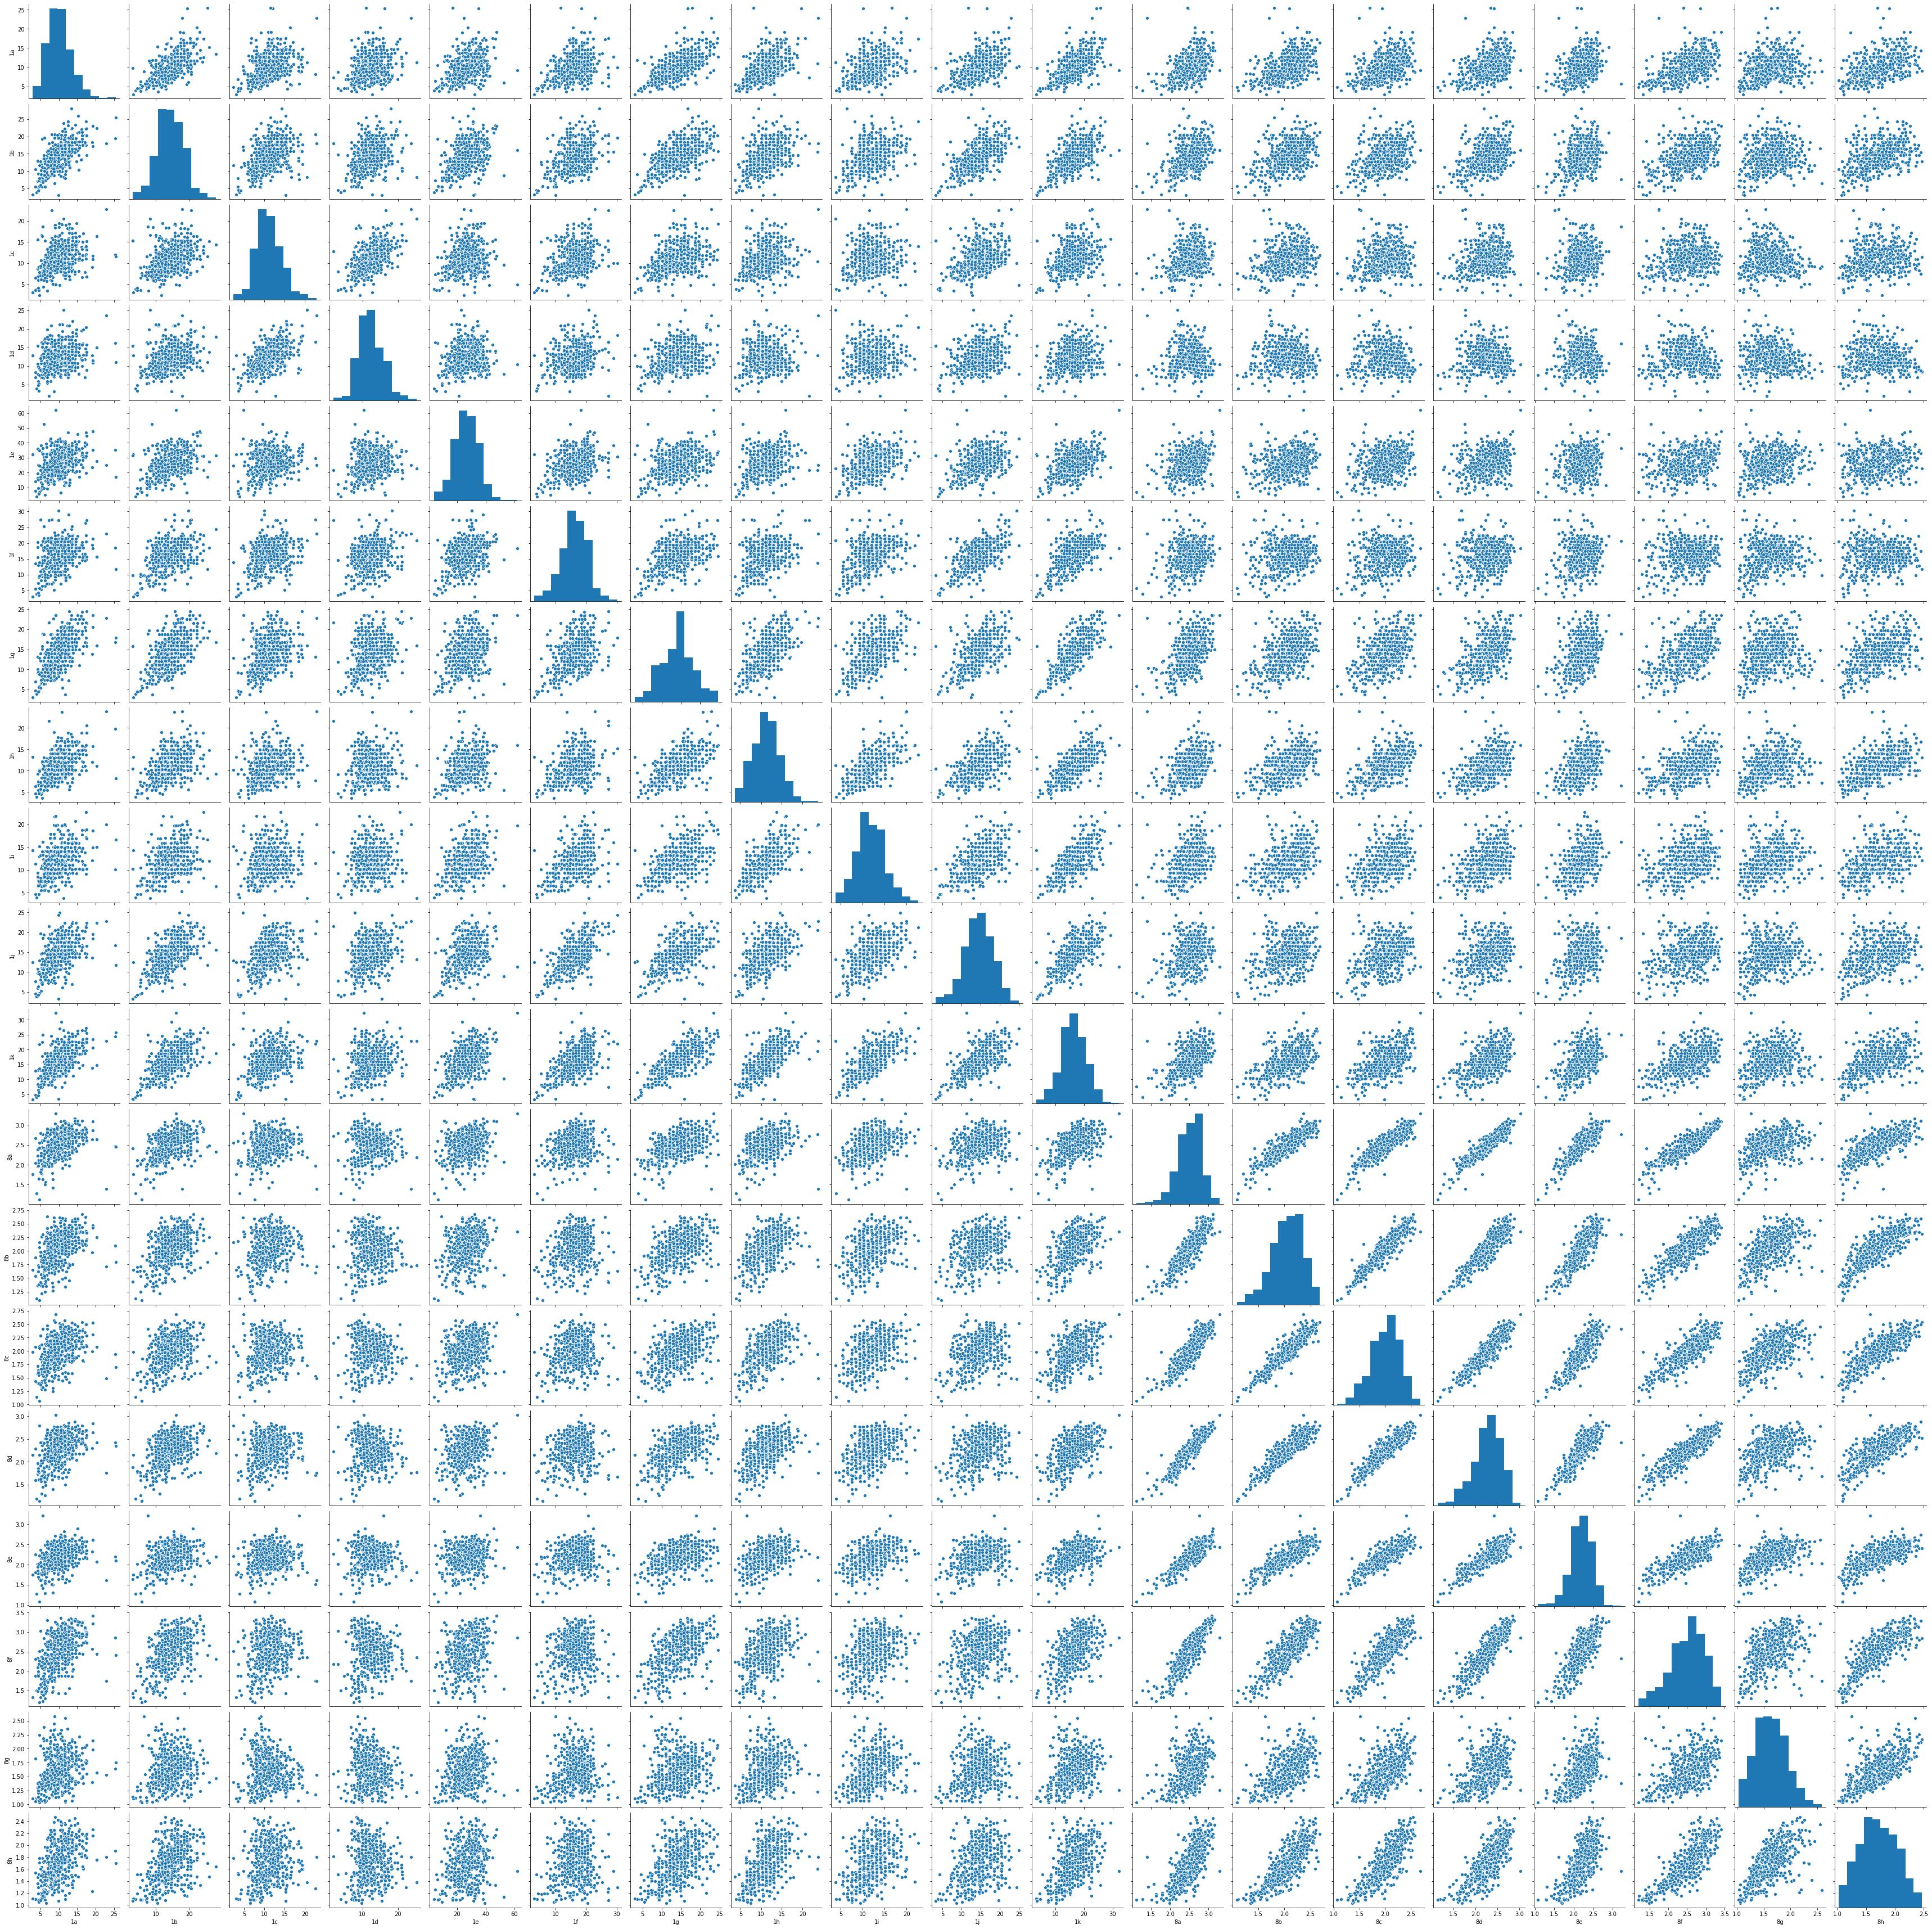

In [40]:
# look questions 1s with 8s
ones = stu_19.iloc[:, 3:14].columns
eights = stu_19.iloc[:, -11:-3].columns
sns.pairplot(stu_19[list(ones) + list(eights)]);

Questions 8s can probably be summarized to just include question 8a, 8g, 8h.  
There some linear relationships, but they are not as strong as questions 8a-8e.

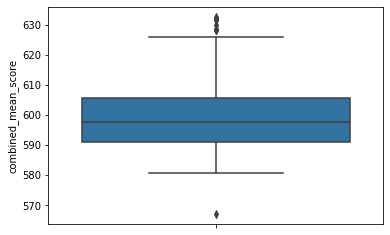

In [52]:
sns.boxplot(stu_19['combined_mean_score'], orient='v');

In [63]:
num_only = stu_19.iloc[:, 3:-1]

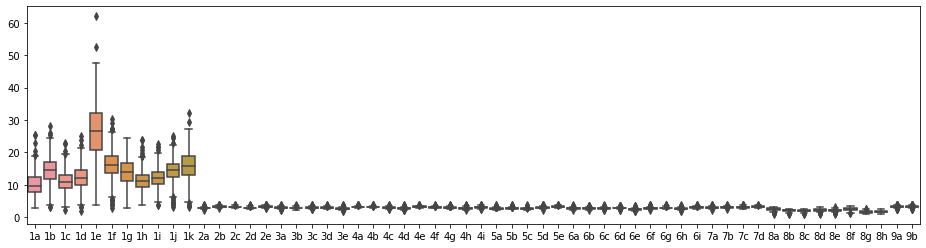

In [64]:
plt.figure(figsize=(16, 4))
sns.boxplot(data=num_only, orient='v');

### Compare surveys for parents, teachers, and students